<div style="text-align: center; background-color: #750E21; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  FINAL PROJECT: RESEARCHING ON HOTEL BOOKING DEMAND 📌
</div>

<div style="text-align: center; background-color: #0766AD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 03 - Analyzing questions 📌
</div>

## **TABLE OF CONTENTS** 🔠 

## **IMPORT LIBRARY** 🎄<a class="anchor" id="c1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  STEP 1: Read cleaned data from clean_data folder 🔥
</div>

In [2]:
pd.set_option('display.max_columns', None)
cleaned_data = pd.read_csv('./data/clean_data/processed_data.csv')
cleaned_data.head()


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,a_d_r,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_type
0,False,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,False,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort hotel
1,False,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,False,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort hotel
2,False,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,False,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort hotel
3,False,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,resort hotel
4,False,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,False,0,0,C,C,0,No Deposit,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,resort hotel


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  STEP 2: Describe the correlation between features in the dataset 🔥
</div>

Considering the available features within the training dataset, we want to identify and analyse the relationships between them, and then determine which features within the dataset significantly contribute to our solution goal. By using calculation and visualisation, Python allows us to create a correlation matrix, which is a table that represents the correlation coefficients between different variables.

🔍 First we need to extract number and datetime columns.

In [3]:
booking_num_df = cleaned_data.select_dtypes(include=['number', 'datetime'])

🔍 Now we will plot the correlations.

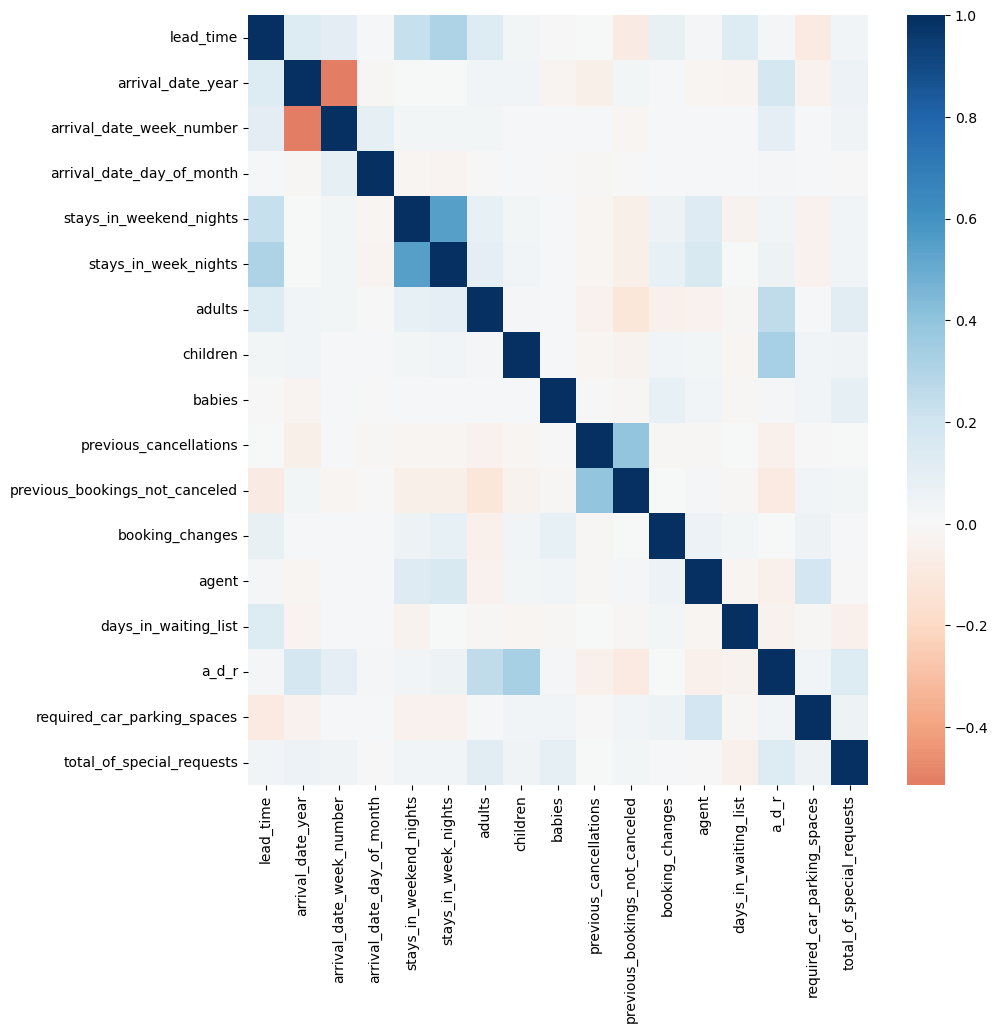

In [4]:
# Plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(booking_num_df.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

### **OBSERVATION** 💬

* At first look, all the features have really weak correlations with other features. This means that maybe there are no linear relationships between our features.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  STEP 3: Coming to the QUESTION SECTION 🔥
</div>

## **Question 1** 🔔

After exploring the data, we have a better understanding of the data. Now let's see what questions can be answered with this data.

❓  **A possible question is:** Which time of the year has most concellations?

✅  **Answering this question will** help the owners to know when most of the concellations occur in order for them to have appropriate policies to stabilize their hotel's revenue. 

💡  **How we answer this question**:    
 
- Extract data of the time columns including `arrival_date_year`, `arrival_date_week_number`, `arrival_date_month`, `arrival_date_day_of_month`.   
- Count for number of cancellations on specific time of the year.(based on month, day of the year, etc)   
- Plot to see the distribution of concellations on these times.     

### **Preprocess data** 📝

First we will extract all the time columns with `is_canceled` column.

In [5]:
time_df = cleaned_data[['is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
                            'arrival_date_day_of_month']]
time_df.head(5)

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month
0,False,2015,July,27,1
1,False,2015,July,27,1
2,False,2015,July,27,1
3,False,2015,July,27,1
4,False,2015,July,27,1


Then let's see if these columns are in their correct data types.

In [6]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87394 entries, 0 to 87393
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   is_canceled                87394 non-null  bool  
 1   arrival_date_year          87394 non-null  int64 
 2   arrival_date_month         87394 non-null  object
 3   arrival_date_week_number   87394 non-null  int64 
 4   arrival_date_day_of_month  87394 non-null  int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 2.8+ MB


### **Analyzing**  📝

#### **Cancellation Status**

🔍  First we will see the distribution of the number of cancellations.

In [7]:
cancellations = time_df['is_canceled'].value_counts(normalize=True)
cancellations

is_canceled
False    0.725096
True     0.274904
Name: proportion, dtype: float64

In [8]:
cancellations = time_df['is_canceled'].value_counts()
cancellations

is_canceled
False    63369
True     24025
Name: count, dtype: int64

👀  Visualization for clearer view.

Text(0.5, 1.0, 'HOTEL CANCELLATION STATUS')

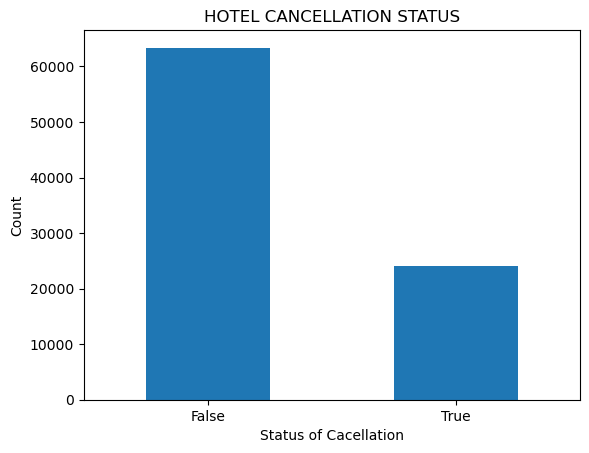

In [9]:
cancellations.plot.bar(rot=0)
plt.xlabel('Status of Cacellation')
plt.ylabel('Count')
plt.title('HOTEL CANCELLATION STATUS')

- Here we can see that the rate of cancellation is about 24% of the total bookings.
- This number is just equal to 1/4 of the total.

#### **Lets find in which month was the hotel cancellations high**

In the column `arrival_date_month`, we have 12 unique values represent for 12 months of a year.

🧮 We will count for number of bookings for each month as well as number of cancellations.

In [10]:
# Extract canceled and month columns
month_df = time_df[['is_canceled', 'arrival_date_month']]

# Count
month_count = month_df.groupby('arrival_date_month').value_counts()

# Save to new df
cancel_month_df = month_count.unstack()

# Rearrange the index
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cancel_month_df = cancel_month_df.reindex(months)
cancel_month_df

is_canceled,False,True
arrival_date_month,,
January,3655,1038
February,4682,1415
March,5683,1830
April,5499,2409
May,5913,2442
June,5411,2354
July,6858,3198
August,7634,3623
September,5048,1642


👀  Visualization for clearer view.

Text(0.5, 1.0, 'Cancellations over Months')

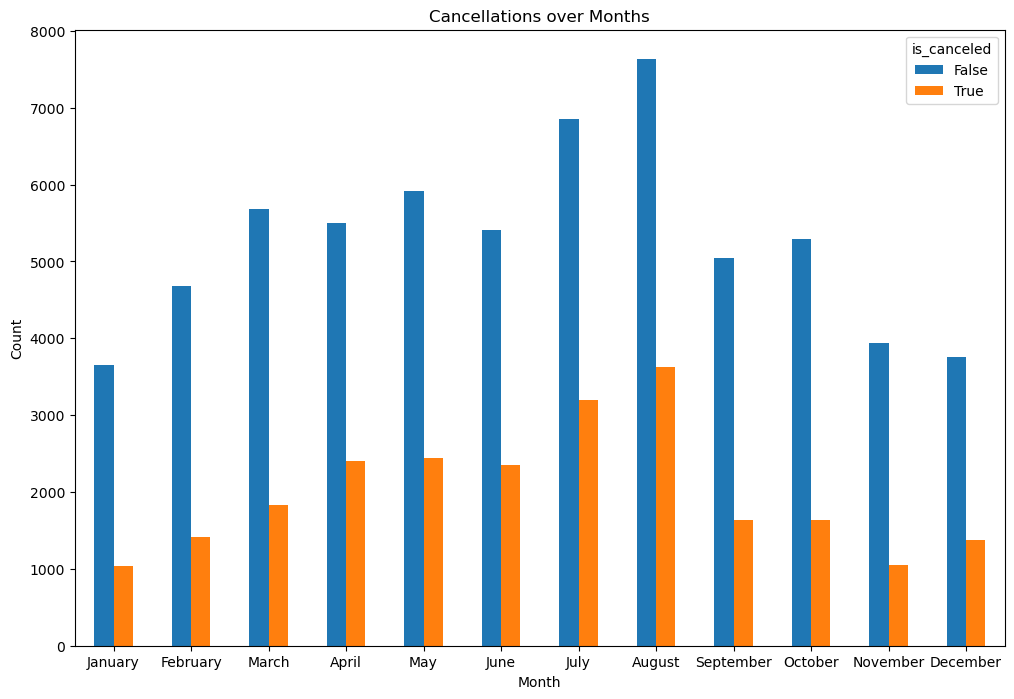

In [11]:
# Set up ax
fig, ax = plt.subplots(figsize=(12, 8))

# Plot group bar chart
cancel_month_df.plot(kind='bar', width=0.5, ax=ax, rot=0)

# Set x, y labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Cancellations over Months')

🔍 August and July have the highest cancellation among all months. They also has the highest bookings. It seems like most people like to travel during these months which also fall into the summer season.   
🔍 November, December and January have the lowest bookings. These months fall into the winter and spring season when the weather is still cold, so probably people don't want to traval much.

#### **Lets find in which time of the month was the hotel cancellations high**

For the column `arrival_date_day_of_month` we have 31 values represent for each day of a month.

🧮 We will count for number of bookings for each day of month as well as number of cancellations.

In [12]:
# Extract canceled and day of month columns
day_df = time_df[['is_canceled', 'arrival_date_day_of_month']]

# Count
day_count = day_df.groupby('arrival_date_day_of_month').value_counts()

# Save to new df
cancel_day_df = day_count.unstack()

# Sort the df by cancellation
cancel_day_df = cancel_day_df.sort_values(True, ascending=False)
cancel_day_df

is_canceled,False,True
arrival_date_day_of_month,,
26,2113,887
17,2145,875
27,2053,849
28,2087,842
29,2040,840
16,2126,833
1,1950,819
8,1998,811
2,2208,808


👀  Since we just consider the days with highest cancellation, we will plot the top 10 days.

Text(0.5, 1.0, 'Cancellations over Days of month')

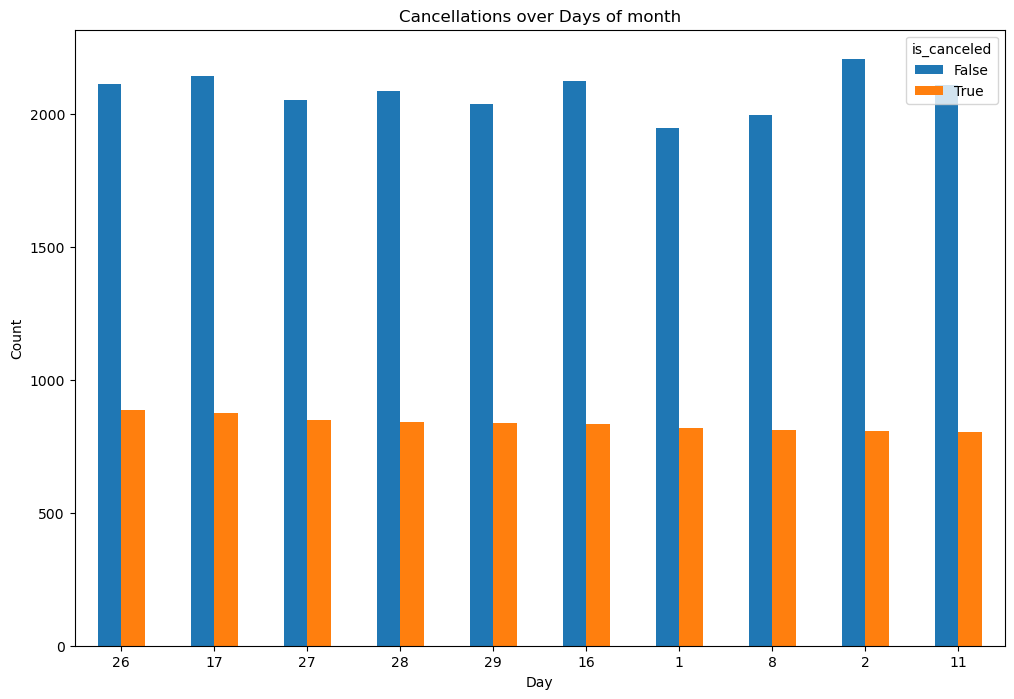

In [13]:
# Set up ax
fig, ax = plt.subplots(figsize=(12, 8))

# Plot group bar chart
cancel_day_df.head(10).plot(kind='bar', width=0.5, ax=ax, rot=0)

# Set x, y labels and title
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Cancellations over Days of month')

🔍 As can be seen, the number of cancellations on each day is not much different at all.   
🔍 Most cancellations fall into the end of month which are 26, 27, 28 and 29.

- Since there are some holidays in the year, we want to know the cancellation on specific day so we will combile the day and month column to see this.

#### **Lets find in which specific day of year was the hotel cancellations high**

🌸 First we will add another column show for specific day by combining the day, month and year column. To do this we need to convert the month column into number.

In [15]:
# Mapping dictionary for month names to numerical values
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Convert the month column to numerical values using the mapping
time_df['arrival_date_month'] = time_df['arrival_date_month'].map(month_mapping)
time_df

/var/folders/m1/4jn3yq_d745fxmxbkhw7ts380000gn/T/ipykernel_54533/4201829474.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['arrival_date_month'] = time_df['arrival_date_month'].map(month_mapping)


,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month
0,False,2015,7,27,1
1,False,2015,7,27,1
2,False,2015,7,27,1
3,False,2015,7,27,1
4,False,2015,7,27,1
...,...,...,...,...,...
87389,False,2017,8,35,30
87390,False,2017,8,35,31
87391,False,2017,8,35,31
87392,False,2017,8,35,31


- Then we combine the day, month and year column into one new column.

In [16]:
# Combine day, month, and year columns into a new 'Date' column with format 'dd/mm/yyyy'
time_df['specific_date'] = time_df['arrival_date_day_of_month'].astype(str).str.zfill(2) + '/' + time_df['arrival_date_month'].astype(str).str.zfill(2) + '/' + time_df['arrival_date_year'].astype(str)

# Convert 'Date' column to datetime format
time_df['specific_date'] = pd.to_datetime(time_df['specific_date'], format='%d/%m/%Y')
time_df

/var/folders/m1/4jn3yq_d745fxmxbkhw7ts380000gn/T/ipykernel_54533/3390460666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['specific_date'] = time_df['arrival_date_day_of_month'].astype(str).str.zfill(2) + '/' + time_df['arrival_date_month'].astype(str).str.zfill(2) + '/' + time_df['arrival_date_year'].astype(str)
/var/folders/m1/4jn3yq_d745fxmxbkhw7ts380000gn/T/ipykernel_54533/3390460666.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['specific_date'] = pd.to_datetime(time_df['spec

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,specific_date
0,False,2015,7,27,1,2015-07-01
1,False,2015,7,27,1,2015-07-01
2,False,2015,7,27,1,2015-07-01
3,False,2015,7,27,1,2015-07-01
4,False,2015,7,27,1,2015-07-01
...,...,...,...,...,...,...
87389,False,2017,8,35,30,2017-08-30
87390,False,2017,8,35,31,2017-08-31
87391,False,2017,8,35,31,2017-08-31
87392,False,2017,8,35,31,2017-08-31


- We group by specific date to count for number of bookings and cancellations.

In [17]:
# Extract cancel and date column
dmy_df = time_df[['is_canceled', 'specific_date']]

# Group by date to count
dmy_count = dmy_df.groupby('specific_date').value_counts().unstack()

# Split true and false
true_count = dmy_count[True]
false_count = dmy_count[False]

👀 Now let's plot 2 line graphs to show cancellations over time.

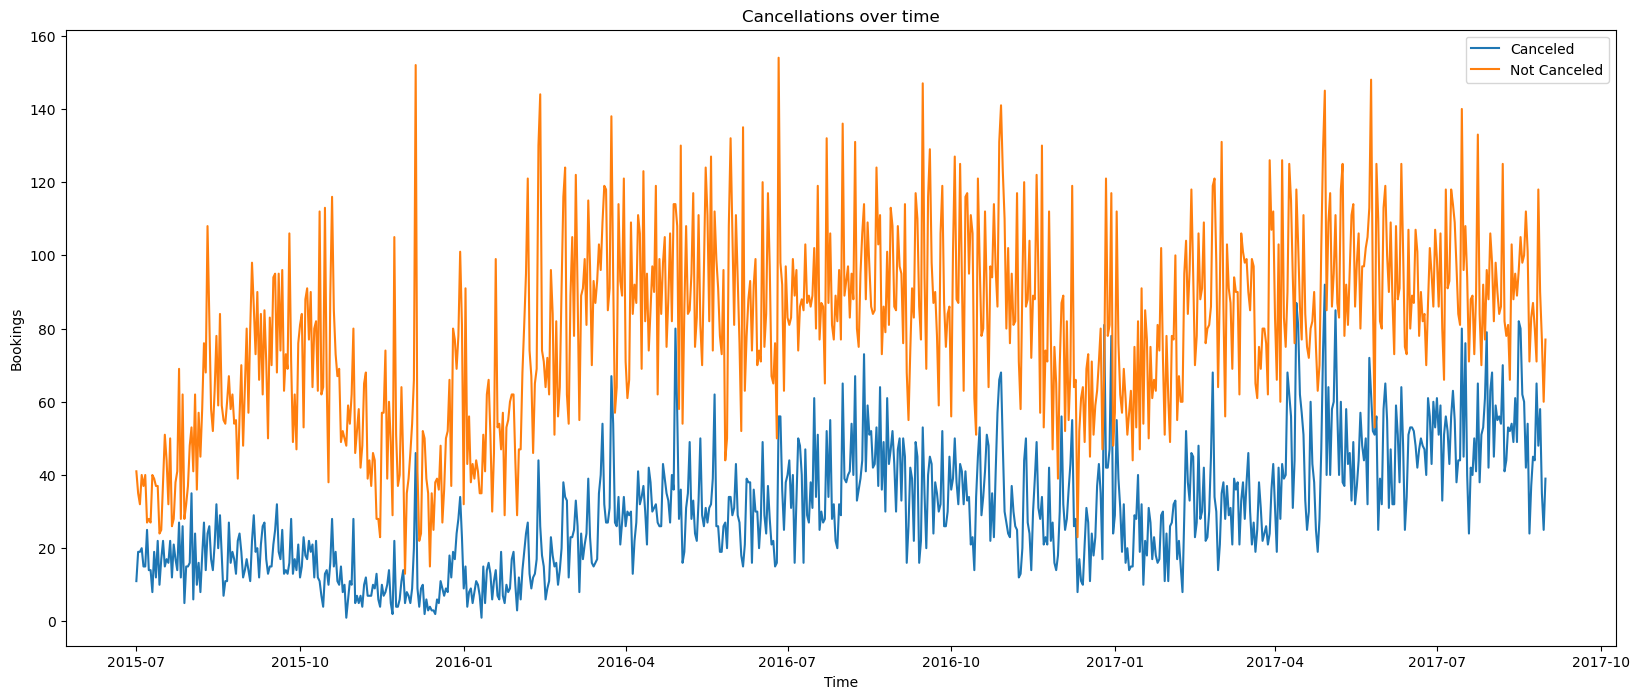

In [18]:
plt.figure(figsize = (20,8))
plt.plot(true_count.index, true_count.values, label = 'Canceled')
plt.plot(false_count.index, false_count.values, label = 'Not Canceled')
plt.title('Cancellations over time')
plt.xlabel('Time')
plt.ylabel('Bookings')
plt.legend()

- In the later years, it seems like the number of cancellations had increased but not too much also the number of bookings.
- These cancellations may be influenced by factors such as seasonality, local events, or demand fluctuations.

#### **Lets find in which week was the hotel cancellations high**

🌸 We will do the same thing just like month and day.

In [19]:
# Extract canceled and week columns
week_df = time_df[['is_canceled', 'arrival_date_week_number']]

# Count
week_count = week_df.groupby('arrival_date_week_number').value_counts()

# Save to new df
cancel_week_df = week_count.unstack()

# Sort the df by cancellation
cancel_week_df = cancel_week_df.sort_values(True, ascending=False)
cancel_week_df

is_canceled,False,True
arrival_date_week_number,,
33,1870,923
32,1666,783
34,1716,775
30,1571,764
28,1596,748
31,1552,735
18,1377,712
27,1456,709
29,1516,681


Text(0.5, 1.0, 'Cancellations over weeks')

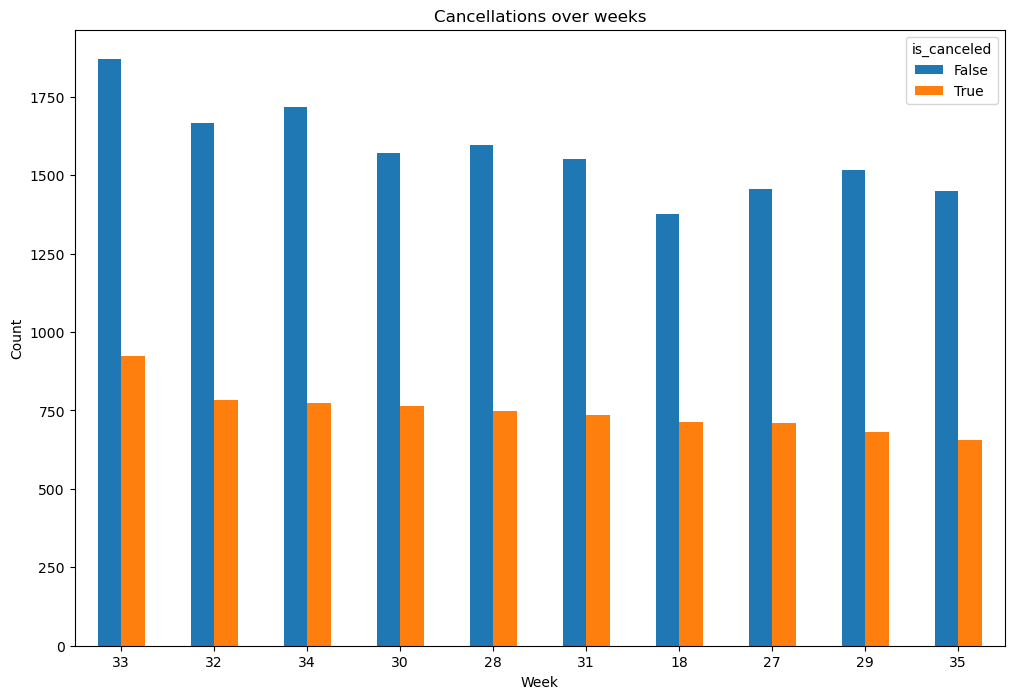

In [20]:
# Set up ax
fig, ax = plt.subplots(figsize=(12, 8))

# Plot group bar chart
cancel_week_df.head(10).plot(kind='bar', width=0.5, ax=ax, rot=0)

# Set x, y labels and title
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Cancellations over weeks')

- Most of the cancellations and bookings fall into week number 30 to 34. 
- Assume that a month has 4 weeks, so week number 30 to 34 will fall into August and September. 
- Compared to the month chart we have plotted above, it seems like the bars are pretty similar. For the month chart, the highest cancellations fall into August and July. The difference between these 2 charts is beacause 4 weeks only have 28 days while there are months that are 30 or 31 days, so our observation maybe a little bit different.

## 📈 Final observations:

- It is clear that the highest bookings fall into September and August. This also lead to the high number of cancellations. So in these months of the year, the hotel's owners should be focus on their hotel policies as well as customer services in order to keep the number of customers.
- Also the number of cancellations also goes high at the end of each month.

## **Question 2 🔔** 

❓ A possible question is: How the factors involving **customers' booking behaviour** contribute to the hotel's performance relating to **cancelation rate** or **repeated guests rate** ?

✅ Answering this question will help the operators on hotels of two types could have insight into the possibility of canceling bookings or rebooking lodge. From that, based on the conclusion, operators could propose more attractive policy to keep the hotel's performance at a good range.

💡 How we answer this question:

* First, from 2 feature `is_canceled` and `is_repeated_guest`, we would analyze and choose out what could be best presented as the output for hotel's performance.
* After that, we will start to visualizing features relating **customers' booking behaviour**, including, then draw out the final conclusion.

### **STAGE 1:** Choose output feature for assessment 📝

🧮 Considering how the features `is_canceled` is distributed

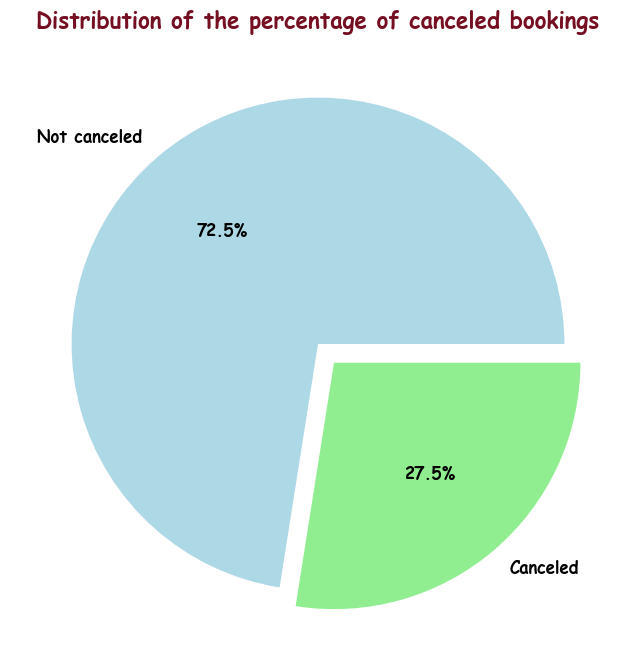

In [3]:
# use pie chart to see how the feature `is_canceled` is distributed
plt.figure(figsize=(8, 8))
plt.pie(cleaned_data['is_canceled'].value_counts(), labels=['Not canceled', 'Canceled'], autopct='%1.1f%%', explode=(0, 0.1), colors=['lightblue', 'lightgreen'], textprops={'fontsize': 12, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold'})
plt.title('Distribution of the percentage of canceled bookings', fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
plt.show()

`COMMENT`: We could see that this feature `is_canceled` is also a truly crucial factor in deciding whether a hotel booking is sucessful or not. The `Canceled` part also take a quite large piece on the pie chart, roughly 27.5%.
* Therefore, I decide to give this feature a weight in the group `importance`.

🧮 Considering how the feature `is_repeated_guest` is distributed.

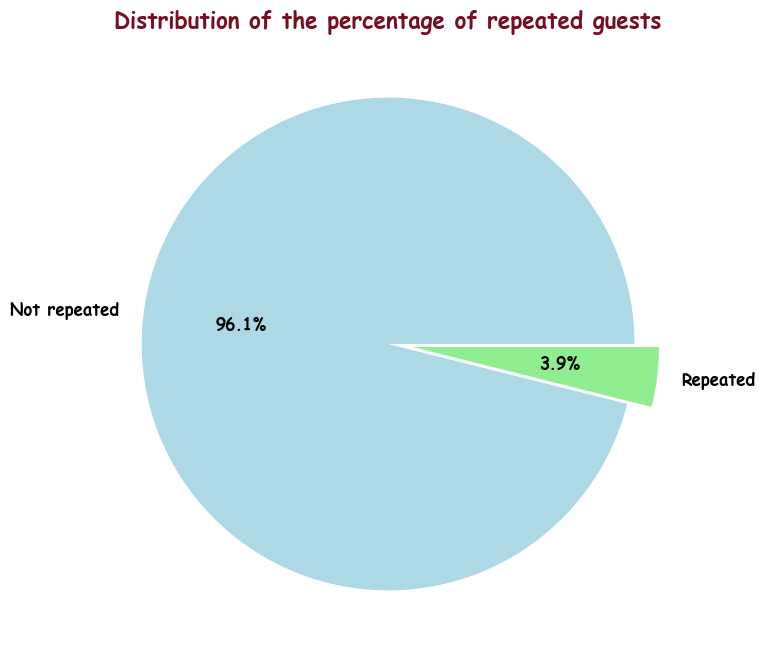

In [4]:
plt.figure(figsize=(8, 8))
plt.pie(cleaned_data['is_repeated_guest'].value_counts(), labels=['Not repeated', 'Repeated'], autopct='%1.1f%%', explode=(0, 0.1), colors=['lightblue', 'lightgreen'], textprops={'fontsize': 12, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold'})
plt.title('Distribution of the percentage of repeated guests', fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
plt.show()

`COMMENT`: 
- From the pie chart ploted, we could see that most of the guests are not in group of repeated guests. Therefore, we decide to list this feature in the group `less importance`.
- After using pie chart to see how importance of the 2 features, I decide to take the feature `is_canceled` to use as the output for hotel's performance.

### **STAGE 2:** Considering customer's behaviour 📝

1. First, we will consider `lead_time` of customer's booking behaviour. 

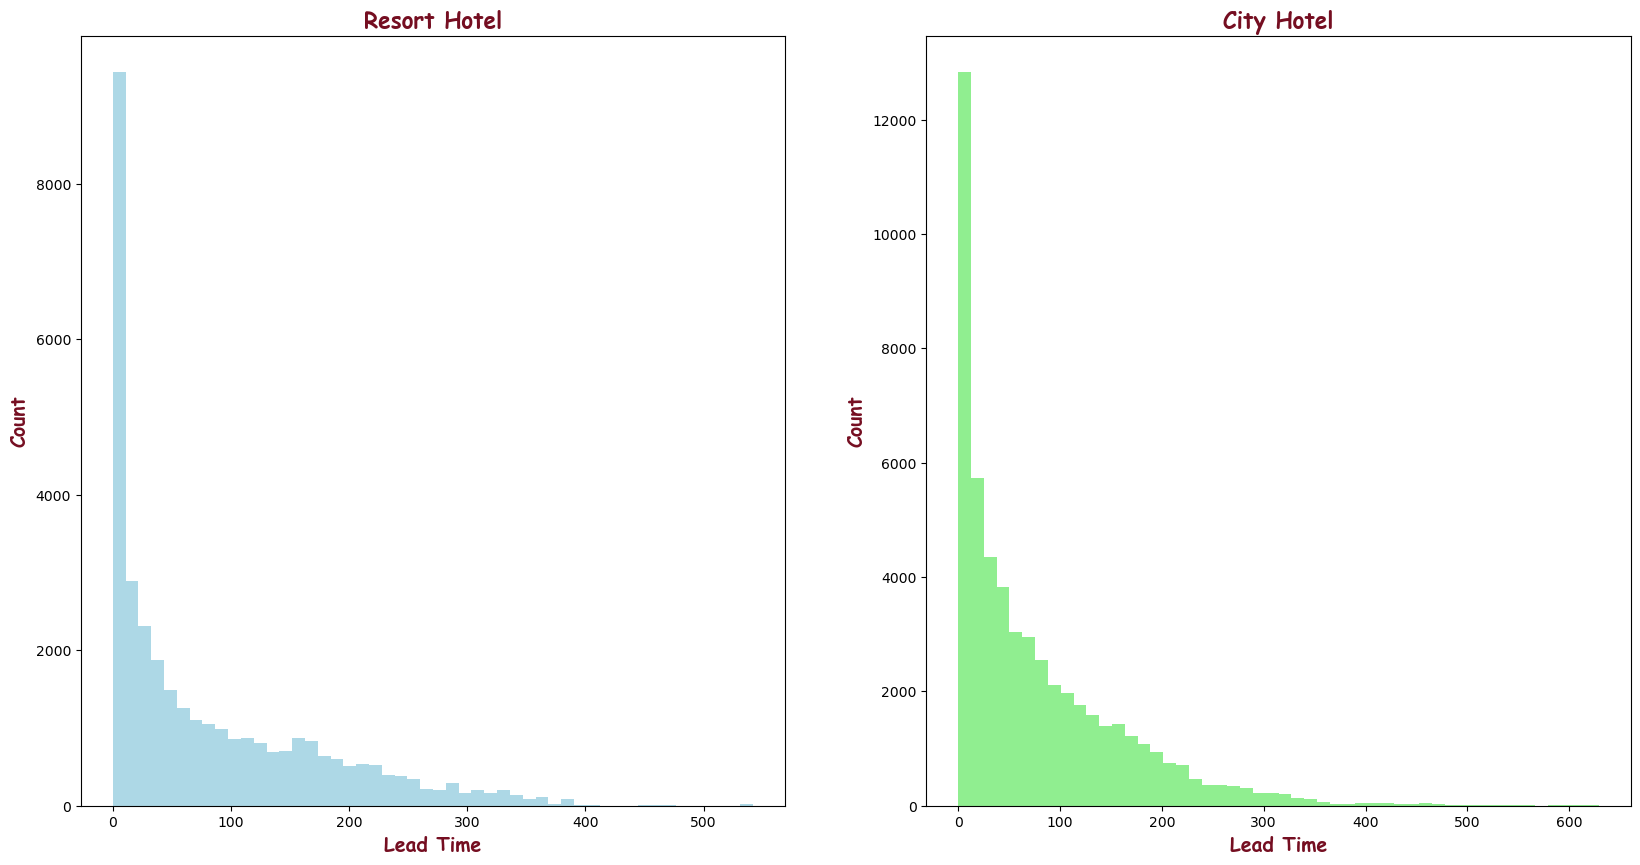

In [5]:
resort_hotel = cleaned_data[cleaned_data['hotel_type'] == 'resort hotel']
city_hotel = cleaned_data[cleaned_data['hotel_type'] == 'city hotel']

# using histogram to see the distribution of lead_time
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].hist(resort_hotel['lead_time'], bins=50, color='lightblue')
axs[1].hist(city_hotel['lead_time'], bins=50, color='lightgreen')
axs[0].set_title('Resort Hotel', fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[1].set_title('City Hotel', fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[0].set_xlabel('Lead Time', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[1].set_xlabel('Lead Time', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[0].set_ylabel('Count', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[1].set_ylabel('Count', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})

plt.show()


`COMMENT:`
- From the histograms above, we could see that most of customers don't have the behaviour of booking for hotels in advanced for a very long time.
- The most common period for preservation is about 50 days close to the check-in date with nearly 9000 bookings in resort hotel and above 12000 bookings in city hotel.


Text(0, 0.5, 'Cancellation Rate')

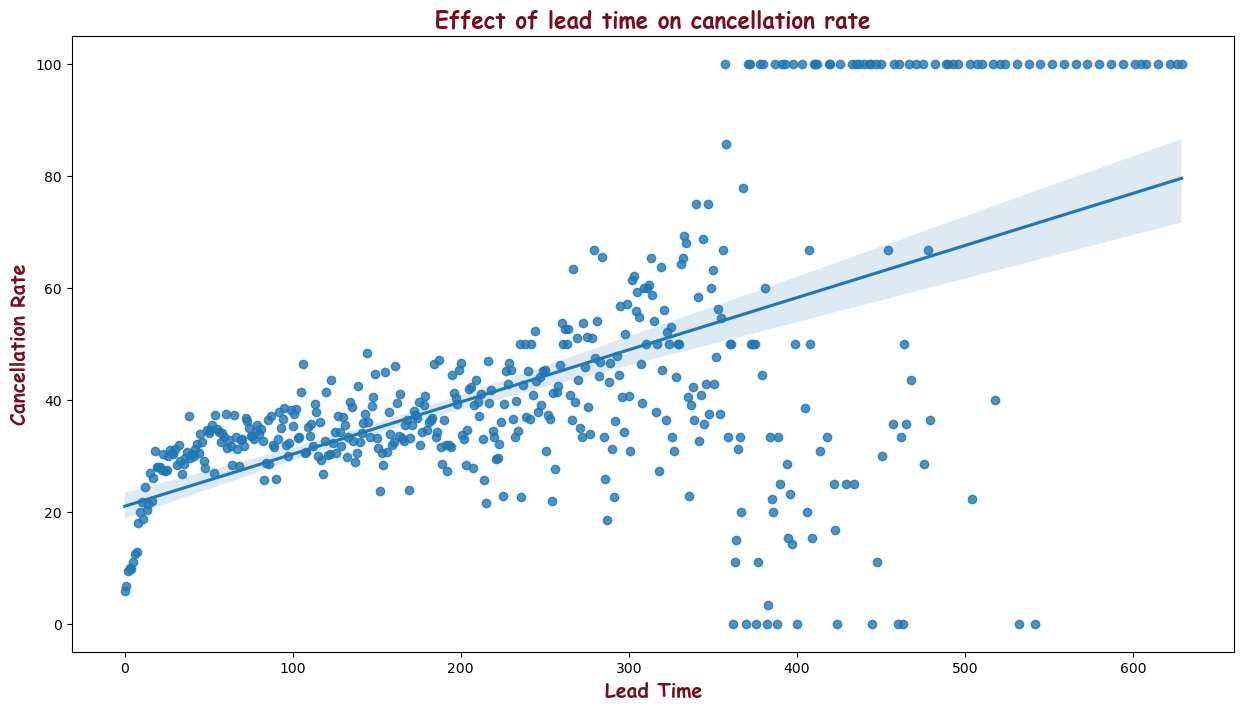

In [12]:
# Get effect of lead time on cancellation rate
lead_cancel_data = cleaned_data.groupby("lead_time")["is_canceled"].mean()

plt.figure(figsize=(15, 8))
sns.regplot(x = lead_cancel_data.index, y = lead_cancel_data.values * 100)

plt.title("Effect of lead time on cancellation rate", fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
plt.xlabel("Lead Time", fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
plt.ylabel("Cancellation Rate", fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})


`COMMENT`: We could see that bookings made a few days before check-in date are rarely canceled, while reservations that are made more than 300 days (1 years) have a high percentage of cancellation. 

Text(0, 0.5, 'Lead Time')

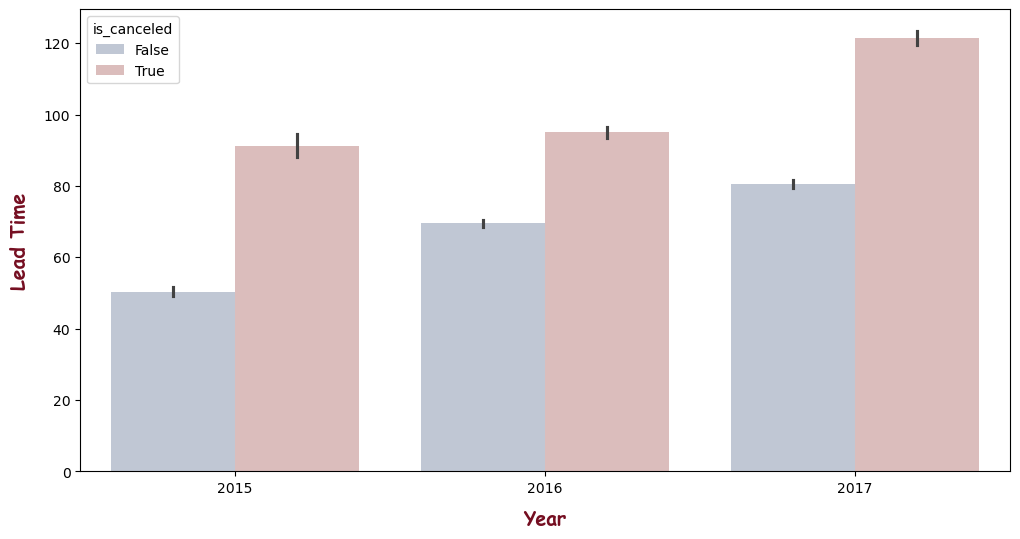

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= cleaned_data, palette='vlag')
plt.xlabel('Year', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'}, labelpad=10)
plt.ylabel('Lead Time', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'}, labelpad=10)


`COMMENT`: Over the years, we could saw an upward trend for reservations before a long number of days before arrival; which means the rate of cancelation is also increased years by years.

2. Secondly, we consider `stays_in_weekend_nights` and `stays_in_week_nights`

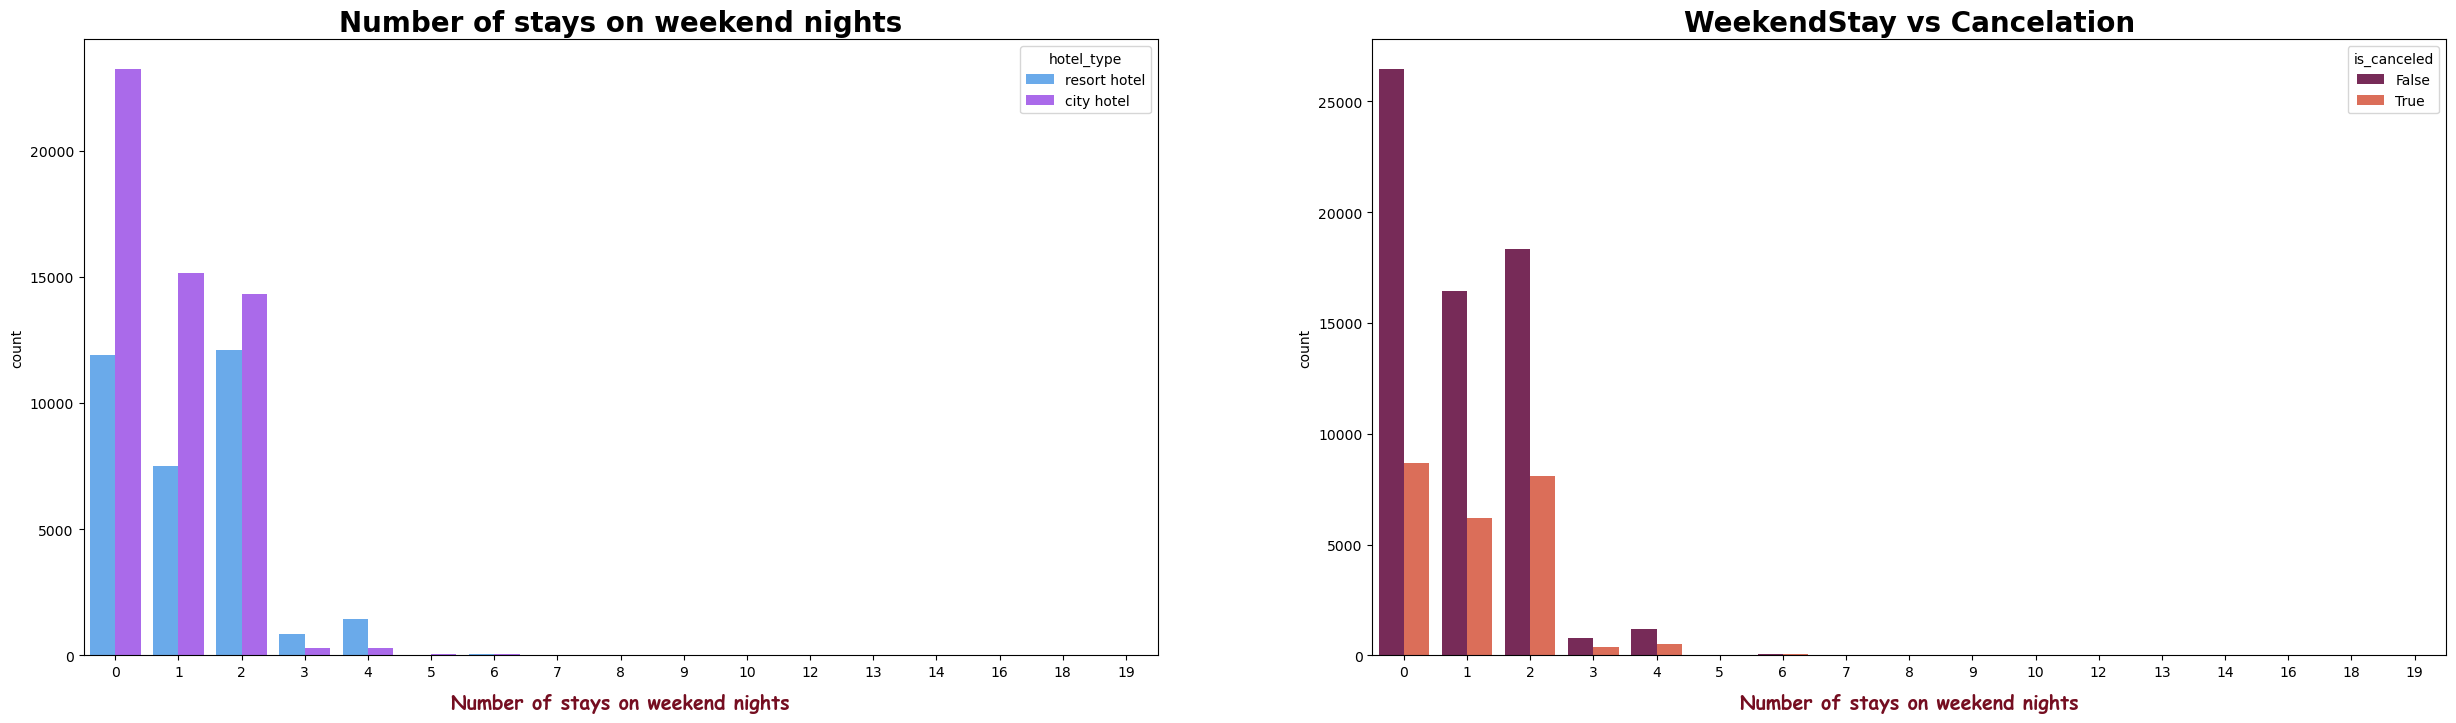

In [20]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel_type', data=cleaned_data, palette='cool')
# set x-axis label
plt.xlabel('Number of stays on weekend nights', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'}, labelpad=10)
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = cleaned_data, x = 'stays_in_weekend_nights', hue='is_canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)
plt.xlabel('Number of stays on weekend nights', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'}, labelpad=10)

plt.show()

`COMMENT:`
- From the given bar chart, we could see that the number of stays on weekend nights is quite humble, nearly 25000 customers didn't spend a single night.
- In the aspect of people spending weekend nights in the hotels, mostly customers decide to stay about from 1 to 2 nights.

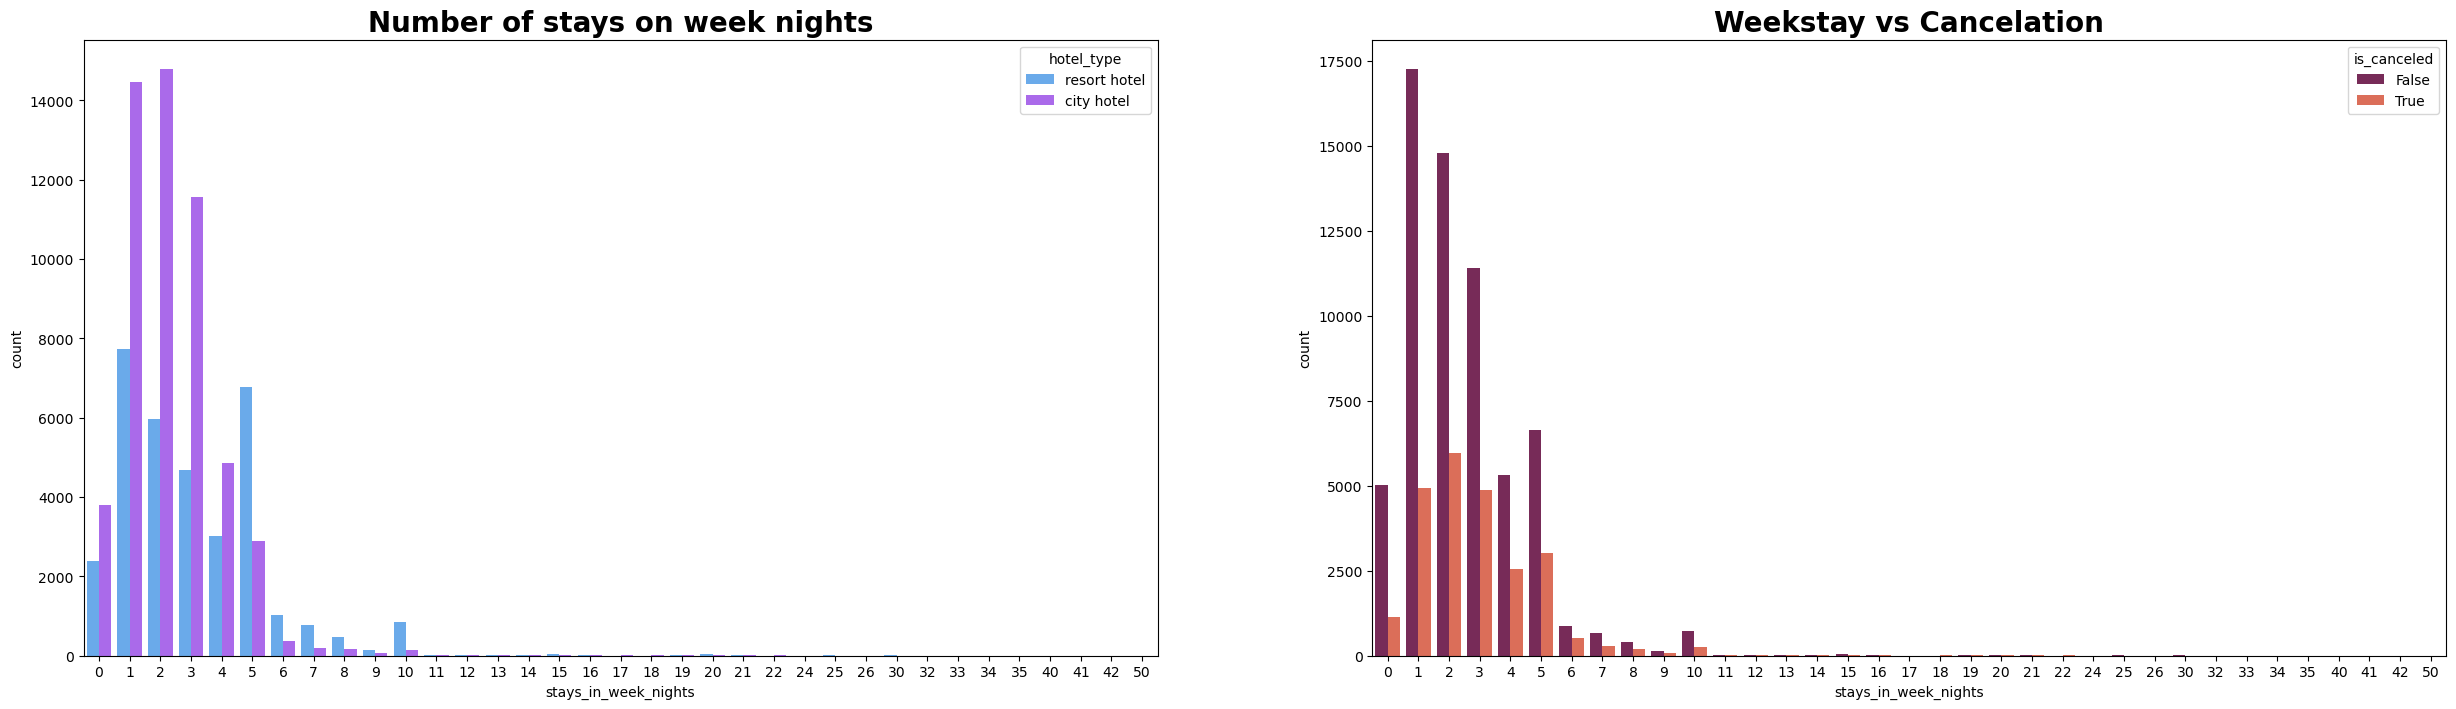

In [23]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_week_nights',hue='hotel_type', data=cleaned_data, palette='cool')
plt.title("Number of stays on week nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = cleaned_data, x = 'stays_in_week_nights', hue='is_canceled', palette='rocket')
plt.title('Weekstay vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7) 

plt.show()

`COMMENT:`
- We could see that the number of stays on week nights outnumbers that of weekend nights. 
- It's noticeable that people staying on week nights at city hotel is also longer than at resort hotel.
- People usually decide to stay about from 1 to 3 days at city hotel; about resort hotel, the day number spent is usually 1,2 or 5 nights.
- Importantly, cancellation rates for weekend nights appear to be higher when compared to week-long stays.

3. Thirdly, we consider `deposit_type`

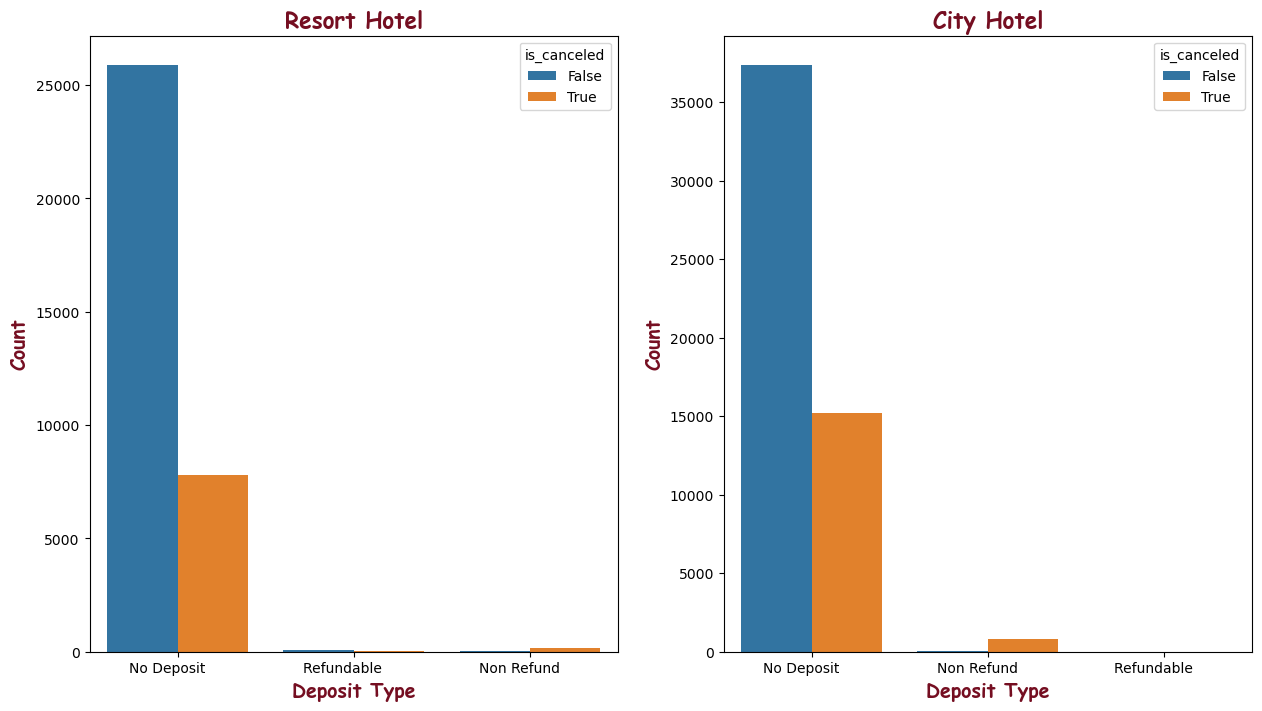

In [22]:
# deposit_type on cancelation on two hotel types
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot(x='deposit_type',hue='is_canceled', data=resort_hotel, ax=axs[0])
axs[0].set_title('Resort Hotel', fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[0].set_xlabel('Deposit Type', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[0].set_ylabel('Count', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
sns.countplot(x='deposit_type',hue='is_canceled', data=city_hotel, ax=axs[1])
axs[1].set_title('City Hotel', fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[1].set_xlabel('Deposit Type', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[1].set_ylabel('Count', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
plt.show()

👀 Let's take closer took at the part 0 ➡ 1000

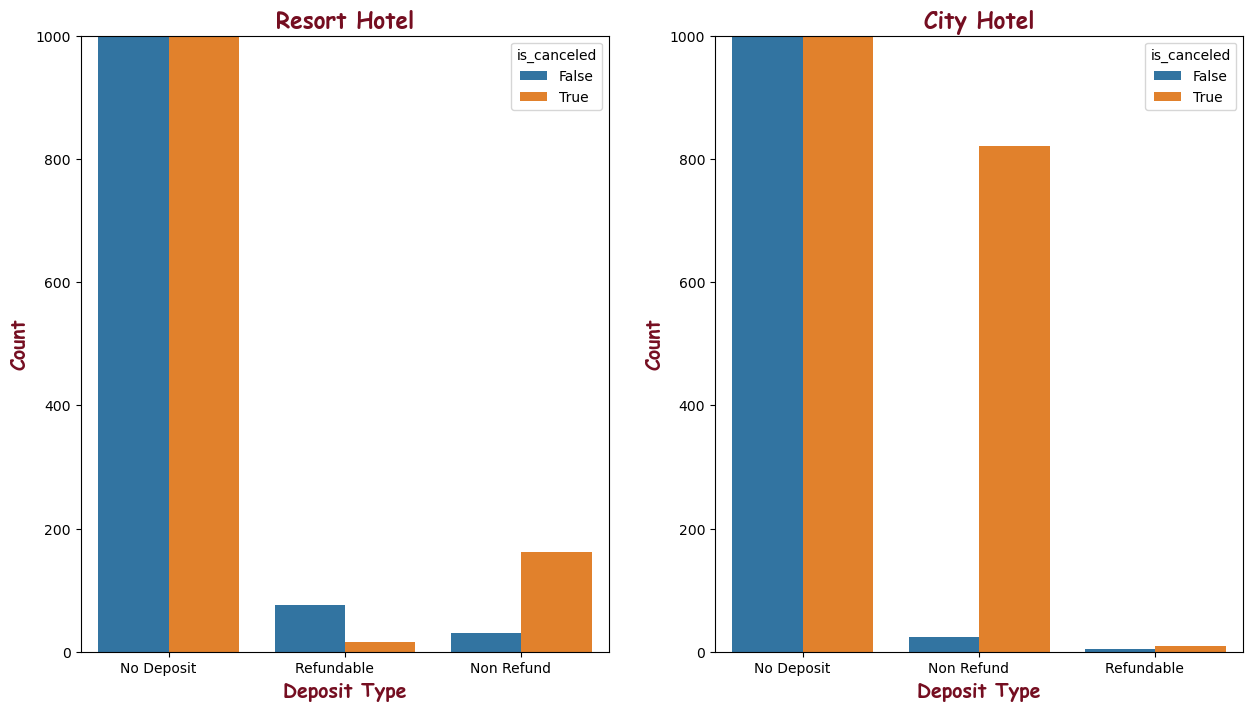

In [27]:
# deposit_type on cancelation on two hotel types
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot(x='deposit_type',hue='is_canceled', data=resort_hotel, ax=axs[0])
axs[0].set_title('Resort Hotel', fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[0].set_xlabel('Deposit Type', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[0].set_ylabel('Count', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[0].set_ylim(0, 1000)
sns.countplot(x='deposit_type',hue='is_canceled', data=city_hotel, ax=axs[1])
axs[1].set_title('City Hotel', fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[1].set_xlabel('Deposit Type', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[1].set_ylabel('Count', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[1].set_ylim(0, 1000)
plt.show()


`COMMENT:`
- From the bar chart of two kinds of hotel, it's clearly that most customers (about 98%) didn't want to pay deposit. 
- A very important spot is that in `non refund` deposit, the percentage of cancelation is extremely high.

### 📈 **FINAL OBSERVATION:**

- Based on those comments, observations, we can come to the conclusion that certain patterns in customer behaviour are related to a higher likelihood of hotel booking cancellations.
    * **Short-term bookings are more stable**:
        * Bookings made closer to the check-in date show a low cancellation rates.
        * Customers have a tendency to commit to their reservation when the check-in date is about to come.
    * **Long-term bookings are facing higher cancellation rates**:
        * There is an upward trend in cancellations for reservations made far in advance, indicating a potential lack of commitment over time.
    * **Weekend Stays Have Higher Cancellation Rates**:
        * Weekend nights got higher cancellation rates compared to week nights.
    * **Non-Refundable Deposits Pose a Risk**:
        * Customers who opt for "non-refundable" deposit options show an extremely high cancellation rate.
        * The majority of customers (about 98%) prefer not to pay a deposit.

### ➡ **STRATEGIES**

* Encourage short-term bookings
    * We could boost last-minute bookings or reservations within a short period by offering special discounts.
* Dynamic pricing for long-term bookings
    * Adjusting price based on lead time to reduce the risk of cancellations.
* Provide weekend stay packages
    * Create attractive weekend packages with discounts or exclusive amenities to encourage longer stays and reduce cancellation rates.
* Provide flexible cancellation policies
    * Offer flexible cancellation policies, especially for reservations made far in advance or for weekends.
* Deposit options
    * We could include more attractive treatments for customers with deposit by offering perks such as room upgrades or additional amenities.